In [ ]:
!pip install ucimlrepo
!pip install matplotlib
!pip install scipy
!pip install seaborn
!pip install statsmodels

In [2]:
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t, chi2
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
print("Zbiór danych: Abalone Data Set (UCI Machine Learning Repository)")
print("Źródło: https://archive.ics.uci.edu/ml/datasets/abalone")


Zbiór danych: Abalone Data Set (UCI Machine Learning Repository)
Źródło: https://archive.ics.uci.edu/ml/datasets/abalone


## Opis danych
Zbiór danych: Abalone Data Set (UCI Machine Learning Repository)
Źródło: https://archive.ics.uci.edu/ml/datasets/abalone

Zbiór danych agreguje cechy związane z biologią suchotek. Cechy mogą być wykorzystane do np. przewidywania wieku zwięrzęcia.
Zbiór danych zawiera 4177 rekordów.

Na stronie ze źródłem danych można przeczytać, że z oryginalnych danych usunięto przykłady z brakującymi wartościami, a zakresy wartości ciągłych zostały przeskalowane poprzez podzielenie przez 200.

In [4]:
abalone = fetch_ucirepo(id=1) 

X = abalone.data.features 
y = abalone.data.targets
df = X
df['Rings'] = y

# OR (number parsing required)
# df = pd.read_csv('./abalone.csv', header=None, names=column_names)


### Tabelaryczna reprezentacja danych

In [5]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Opis cech

| Nazwa zmiennej     | Typ         | Opis                                 | Jednostki |
|--------------------|-------------|--------------------------------------|-----------|
| Płeć               | Kategoryczna| M, F i I (niemowlę)                  |           |
| Długość            | Ciągła      | Najdłuższy wymiar muszli             | mm        |
| Średnica           | Ciągła      | Prostopadle do długości              | mm        |
| Wysokość           | Ciągła      | Z mięsem w muszli                    | mm        |
| Masa_całkowita     | Ciągła      | Cała suchotka                        | gramy     |
| Masa_mięsa         | Ciągła      | Masa samego mięsa                    | gramy     |
| Masa_wnętrzności   | Ciągła      | Masa wnętrzności         | gramy     |
| Masa_muszli        | Ciągła      | Po wysuszeniu                        | gramy     |
| Pierścienie        | Liczba całkowita | +1.5 daje wiek w latach         |           |


### Histogramy cech numerycznych

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole_weight'}>,
        <Axes: title={'center': 'Shucked_weight'}>,
        <Axes: title={'center': 'Viscera_weight'}>],
       [<Axes: title={'center': 'Shell_weight'}>,
        <Axes: title={'center': 'Rings'}>, <Axes: >]], dtype=object)

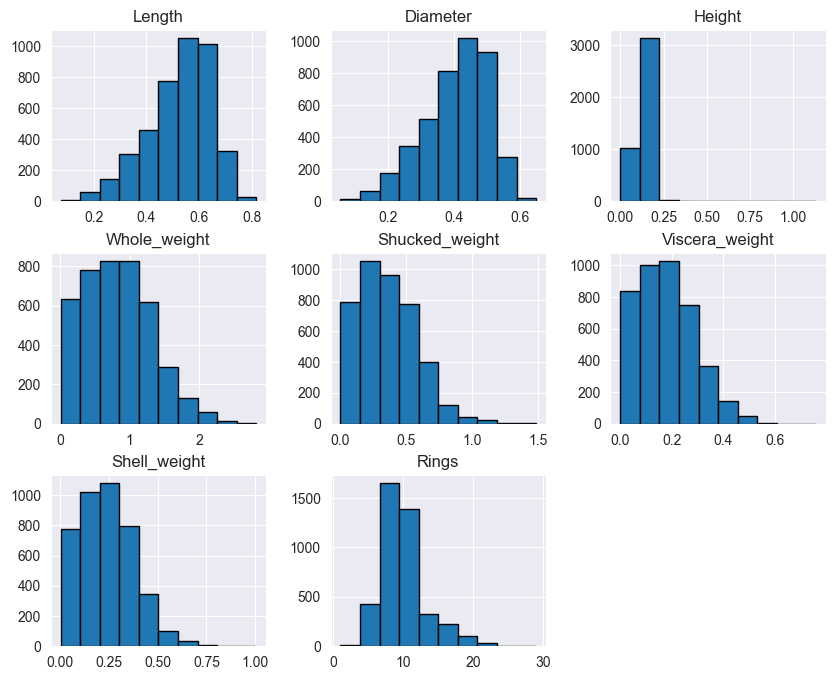

In [5]:
numeric_columns = ["Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", 'Rings']
df[numeric_columns].hist(figsize=(10, 8), bins=10, edgecolor='black')

Dla każdego z powyższych histogramów cechy dodatkowo nałożono estymator jądrowy gęstości (KDE) oparty na funkcji Gaussa, który pozwala zobrazować przybliżony kształt rozkładu danej cechy w sposób ciągły i wygładzony.

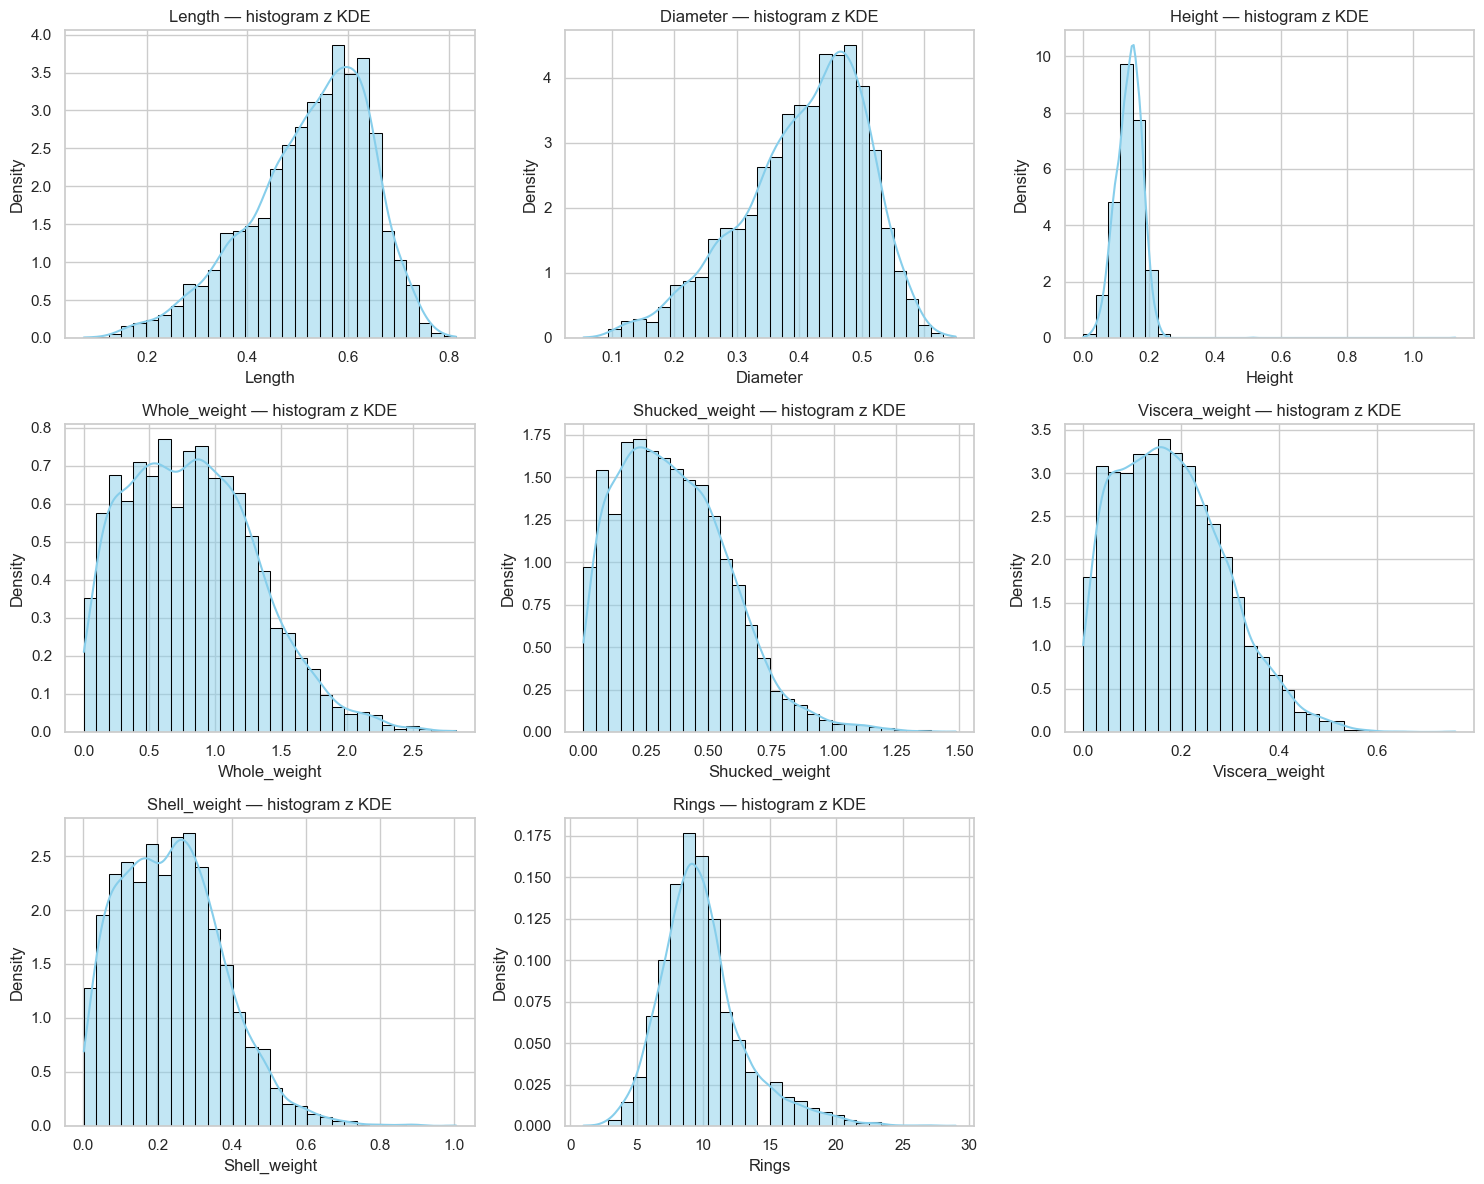

In [19]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
                'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

numeric_columns = ["Length", "Diameter", "Height", "Whole_weight",
                   "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]

sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(data=df, x=col, kde=True, stat="density", bins=30, ax=axes[i], edgecolor="black", color="skyblue", kde_kws={"bw_adjust": 1})
    axes[i].set_title(f'{col} — histogram z KDE')

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Na podstawie histogramu przedstawiającego liczbę pierścieni (Rings) z podziałem na płeć (Sex) widać, że największa liczba osobników, niezależnie od płci, znajduje się w przedziale 8–12 pierścieni, co odpowiada wiekowi około 9,5–13,5 roku. W okolicach 8-10 pierścieni zauważalny jest spadek liczby osobników oznaczonych jako I (niedojrzałe) co sugeruje że wtedy znacząca część osobników przekształca się w samce lub samice co znaczy że od tego momentu przechodzą do jednej z dwóch pozostałych grup.

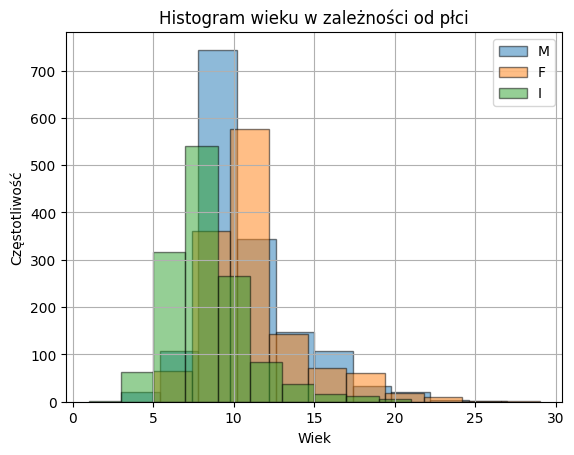

In [82]:
fig, ax = plt.subplots()
for sex in df["Sex"].unique():
    df[df["Sex"] == sex]["Rings"].hist(alpha=0.5, bins=10, label=sex, edgecolor='black')

plt.xlabel("Wiek")
plt.ylabel("Częstotliwość")
plt.title("Histogram wieku w zależności od płci")
plt.legend()
plt.show()

## Estymacja parametrów rozkładu (punktowa)

- średnia
- odchylenie standardowe
- odchylenie przeciętne
- mediana
- moda
- wariancja
- kurtoza
- skośność
- IQR
- kwantyle (25, 75)

In [ ]:
desc = df[numeric_columns].describe().T
desc['mad'] = df[numeric_columns].apply(lambda x: np.mean(np.abs(x - np.mean(x))))
desc['mode'] = df[numeric_columns].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
desc['skew'] = df[numeric_columns].skew()
desc['var'] = df[numeric_columns].var()
desc['kurtosis'] = df[numeric_columns].kurtosis()
desc['iqr'] = df[numeric_columns].apply(stats.iqr)
desc['q25'] = df[numeric_columns].quantile(0.25)
desc['q75'] = df[numeric_columns].quantile(0.75)

desc[['mean','std','mad','50%','mode','var','kurtosis','skew','iqr','q25','q75']]


,mean,std,mad,50%,mode,var,kurtosis,skew,iqr,q25,q75
Length,0.523992,0.120093,0.096678,0.5450,0.5500,0.014422,0.064621,-0.639873,0.1650,0.4500,0.615
Diameter,0.407881,0.099240,0.080296,0.4250,0.4500,0.009849,-0.045476,-0.609198,0.1300,0.3500,0.480
Height,0.139516,0.041827,0.031285,0.1400,0.1500,0.001750,76.025509,3.128817,0.0500,0.1150,0.165
Whole_weight,0.828742,0.490389,0.400454,0.7995,0.2225,0.240481,-0.023644,0.530959,0.7115,0.4415,1.153
Shucked_weight,0.359367,0.221963,0.179455,0.3360,0.1750,0.049268,0.595124,0.719098,0.3160,0.1860,0.502
Viscera_weight,0.180594,0.109614,0.089252,0.1710,0.1715,0.012015,0.084012,0.591852,0.1595,0.0935,0.253
Shell_weight,0.238831,0.139203,0.112415,0.2340,0.2750,0.019377,0.531926,0.620927,0.1990,0.1300,0.329
Rings,9.933684,3.224169,2.362462,9.0000,9.0000,10.395266,2.330687,1.114102,3.0000,8.0000,11.000


Poniżej uwzględniono estymację parametrów względem zmiennej dyskretnej będącej płcią (Sex).

In [18]:
from scipy import stats

def calculate_stats(group):
    stats_dict = {}
    stats_dict['mad'] = np.mean(np.abs(group - np.mean(group)))
    stats_dict['mode'] = group.mode().iloc[0] if not group.mode().empty else np.nan
    stats_dict['skew'] = group.skew()
    stats_dict['var'] = group.var()
    stats_dict['kurtosis'] = np.round( stats.kurtosis(group, nan_policy='omit'), 4)
    stats_dict['iqr'] = stats.iqr(group)
    stats_dict['q25'] = group.quantile(0.25)
    stats_dict['q75'] = group.quantile(0.75)
    stats_dict['mean'] = group.mean()
    stats_dict['std'] = group.std()
    stats_dict['50%'] = group.median()
    return pd.Series(stats_dict)

desc_by_sex = df.groupby("Sex")[numeric_columns].apply(calculate_stats)

desc_by_sex = desc_by_sex.T

desc_by_sex

Sex,F,I,M
mad,2.336716,1.673525,2.250759
mode,Length 0.6250 Diameter 0...,Length 0.440 Diameter 0.35...,Length 0.6000 Diameter 0...
skew,Length -0.528735 Diameter ...,Length -0.346951 Diameter -0...,Length -0.913565 Diameter -0...
var,Length 0.007423 Diameter 0...,Length 0.011850 Diameter 0...,Length 0.010547 Diameter 0...
kurtosis,"[0.1061, 0.1525, 265.5965, 0.059, 0.6572, -0.0...","[-0.301, -0.4044, 0.0704, 1.4126, 0.6497, 1.63...","[1.0995, 1.0531, 7.6946, 0.3522, 0.8307, 0.629..."
iqr,0.4515,0.344125,0.45375
q25,Length 0.52500 Diameter 0....,Length 0.360000 Diameter 0...,Length 0.505000 Diameter 0...
q75,Length 0.64000 Diameter ...,Length 0.510000 Diameter 0...,Length 0.630000 Diameter ...
mean,Length 0.579093 Diameter ...,Length 0.427746 Diameter 0...,Length 0.561391 Diameter ...
std,Length 0.086160 Diameter 0...,Length 0.108858 Diameter 0...,Length 0.102697 Diameter 0...


## Estymacja parametrów (przedziałowa)

Realizacja przedziałów ufności dla wariancji i dla średniej na poziomie istotności 0.05
- Przedziały ufności metodą parametryczną dla wariancji i dla średniej
- Porównanie średniej z metodą bootstrap

In [ ]:
alpha = 0.05
n_boot = 10000
results = []

for col in numeric_columns:
    x = df[col]
    n = len(x)
    mean = x.mean()
    std = x.std(ddof=1)
    var = x.var(ddof=1)
    
    # Średnia (parametryczna)
    t_crit = t.ppf(1 - alpha/2, n-1)
    ci_mean = (mean - t_crit * std / np.sqrt(n), mean + t_crit * std / np.sqrt(n))

    # Wariancja (parametryczna)
    chi2_lower = chi2.ppf(alpha/2, n-1)
    chi2_upper = chi2.ppf(1-alpha/2, n-1)
    ci_var = ((n-1)*var/chi2_upper, (n-1)*var/chi2_lower)
    
    # Bootstrap
    boot_means = np.random.choice(x, (n_boot, n)).mean(axis=1)
    ci_bootstrap = np.percentile(boot_means, [100 * alpha / 2, 100 * (1 - alpha / 2)])

    results.append({
        "Cecha": col,
        "Średnia": np.round(mean, 4),
        "Przedział_średnia": np.round(ci_mean, 4),
        "Przedział_średnia_bootstrap": np.round(ci_bootstrap, 4),
        "Wariancja": np.round(var, 4),
        "Przedział_wariancja": np.round(ci_var, 4)
    })

ci_df = pd.DataFrame(results)
ci_df

,Cecha,Średnia,Przedział_średnia,Przedział_średnia_bootstrap,Wariancja,Przedział_wariancja
0,Length,0.5240,"[0.5203, 0.5276]","[0.5204, 0.5276]",0.0144,"[0.0138, 0.0151]"
1,Diameter,0.4079,"[0.4049, 0.4109]","[0.4048, 0.4109]",0.0098,"[0.0094, 0.0103]"
2,Height,0.1395,"[0.1382, 0.1408]","[0.1383, 0.1408]",0.0017,"[0.0017, 0.0018]"
3,Whole_weight,0.8287,"[0.8139, 0.8436]","[0.8136, 0.8434]",0.2405,"[0.2305, 0.2511]"
4,Shucked_weight,0.3594,"[0.3526, 0.3661]","[0.3526, 0.3662]",0.0493,"[0.0472, 0.0515]"
5,Viscera_weight,0.1806,"[0.1773, 0.1839]","[0.1773, 0.1839]",0.0120,"[0.0115, 0.0125]"
6,Shell_weight,0.2388,"[0.2346, 0.2431]","[0.2346, 0.2431]",0.0194,"[0.0186, 0.0202]"
7,Rings,9.9337,"[9.8359, 10.0315]","[9.8353, 10.0304]",10.3953,"[9.9634, 10.856]"


W kolejnej części tej analizy uwzględniono podział na płeć osobników – analizując trzy biologicznie istotne cechy:

Whole_weight,

Shucked_weight,

Viscera_weight.

In [20]:
from scipy.stats import t, chi2

alpha = 0.05
n_boot = 10000
selected_columns = ['Whole_weight', 'Shucked_weight', 'Viscera_weight']
results_sex = []

for sex in df['Sex'].unique():
    df_sex = df[df['Sex'] == sex]
    
    for col in selected_columns:
        x = df_sex[col]
        n = len(x)
        mean = x.mean()
        std = x.std(ddof=1)
        var = x.var(ddof=1)
        
        # Średnia (parametryczna)
        t_crit = t.ppf(1 - alpha/2, n-1)
        ci_mean = (mean - t_crit * std / np.sqrt(n), mean + t_crit * std / np.sqrt(n))

        # Wariancja (parametryczna)
        chi2_lower = chi2.ppf(alpha/2, n-1)
        chi2_upper = chi2.ppf(1-alpha/2, n-1)
        ci_var = ((n-1)*var/chi2_upper, (n-1)*var/chi2_lower)

        # Bootstrap
        boot_means = np.random.choice(x, (n_boot, n)).mean(axis=1)
        ci_bootstrap = np.percentile(boot_means, [100 * alpha / 2, 100 * (1 - alpha / 2)])
        
        results_sex.append({
            "Płeć": sex,
            "Cecha": col,
            "Liczność": n,
            "Średnia": np.round(mean, 4),
            "Przedział_średnia": np.round(ci_mean, 4),
            "Przedział_średnia_bootstrap": np.round(ci_bootstrap, 4),
            "Wariancja": np.round(var, 4),
            "Przedział_wariancja": np.round(ci_var, 4)
        })

ci_sex_df = pd.DataFrame(results_sex)
ci_sex_df


,Płeć,Cecha,Liczność,Średnia,Przedział_średnia,Przedział_średnia_bootstrap,Wariancja,Przedział_wariancja
0,M,Whole_weight,1528,0.9915,"[0.9678, 1.0151]","[0.9682, 1.0149]",0.2214,"[0.2065, 0.238]"
1,M,Shucked_weight,1528,0.4329,"[0.4218, 0.4441]","[0.4215, 0.4441]",0.0497,"[0.0464, 0.0535]"
2,M,Viscera_weight,1528,0.2155,"[0.2103, 0.2208]","[0.2104, 0.2208]",0.0110,"[0.0103, 0.0118]"
3,F,Whole_weight,1307,1.0465,"[1.0232, 1.0699]","[1.023, 1.0701]",0.1852,"[0.1718, 0.2002]"
4,F,Shucked_weight,1307,0.4462,"[0.4354, 0.457]","[0.4354, 0.4571]",0.0395,"[0.0366, 0.0427]"
5,F,Viscera_weight,1307,0.2307,"[0.2254, 0.236]","[0.2254, 0.236]",0.0095,"[0.0088, 0.0103]"
6,I,Whole_weight,1342,0.4314,"[0.416, 0.4467]","[0.4163, 0.447]",0.0820,"[0.0761, 0.0885]"
7,I,Shucked_weight,1342,0.1910,"[0.1842, 0.1979]","[0.1842, 0.1978]",0.0165,"[0.0153, 0.0178]"
8,I,Viscera_weight,1342,0.0920,"[0.0887, 0.0954]","[0.0888, 0.0953]",0.0039,"[0.0036, 0.0042]"


Masa całkowita, masa mięsa oraz masa trzewi wyraźnie różnią się pomiędzy płciami:

Samice (F) osiągają najwyższe wartości średnie.

Samce (M) mają nieco niższe wartości niż samice.

Osobniki młode (I) charakteryzują się najniższymi wartościami wszystkich cech.

Przedziały ufności dla średnich wartości cech u samców i samic nie zawsze się pokrywają, co sugeruje statystycznie istotne różnice między płciami.

Estymacja przedziałów ufności metodą bootstrapową i metodą parametryczną daje bardzo zbliżone wyniki, co:

potwierdza wiarygodność zastosowanych metod, oraz

wskazuje na prawdopodobną normalność rozkładu danych.

Wariancje cech są wyższe u samców i samic niż u osobników młodocianych, co oznacza, że osobniki dojrzałe są bardziej zróżnicowane pod względem badanych cech niż osobniki młode.

### Wnioski:
- Przedziały wyznaczone metodą parametryczną i bootstrap są do siebie bardzo zbliżone

## Wizualizacja danych na wykresach

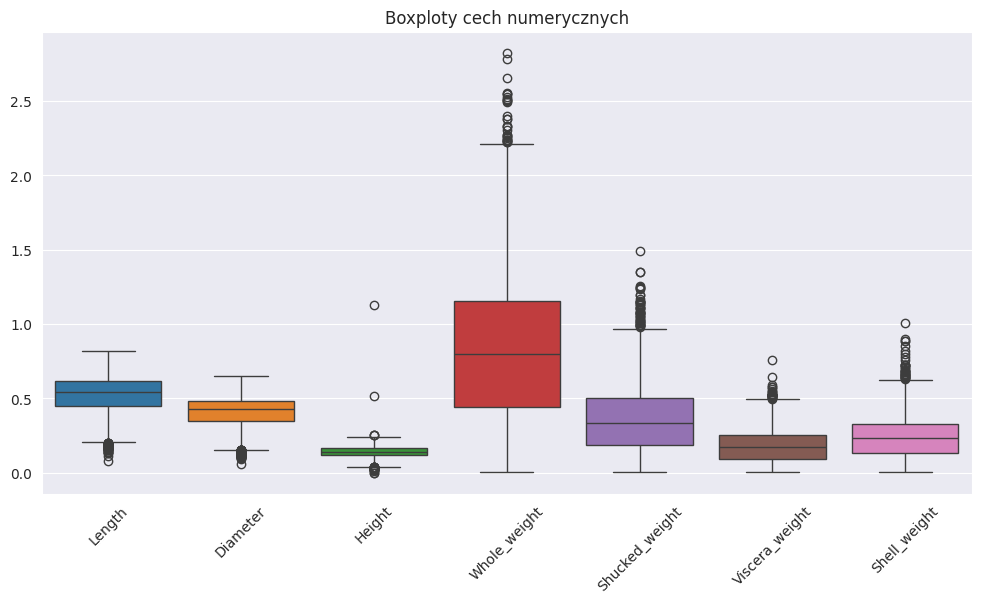

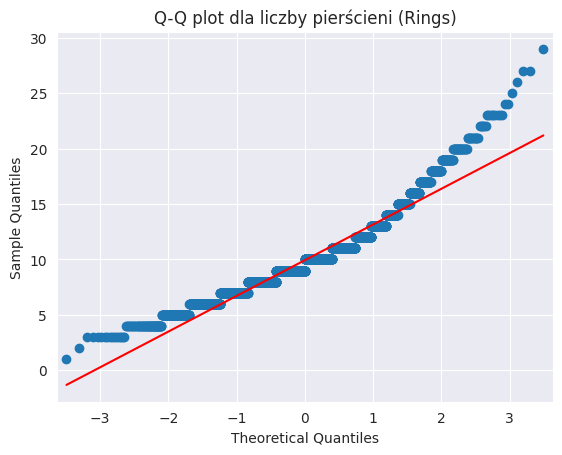

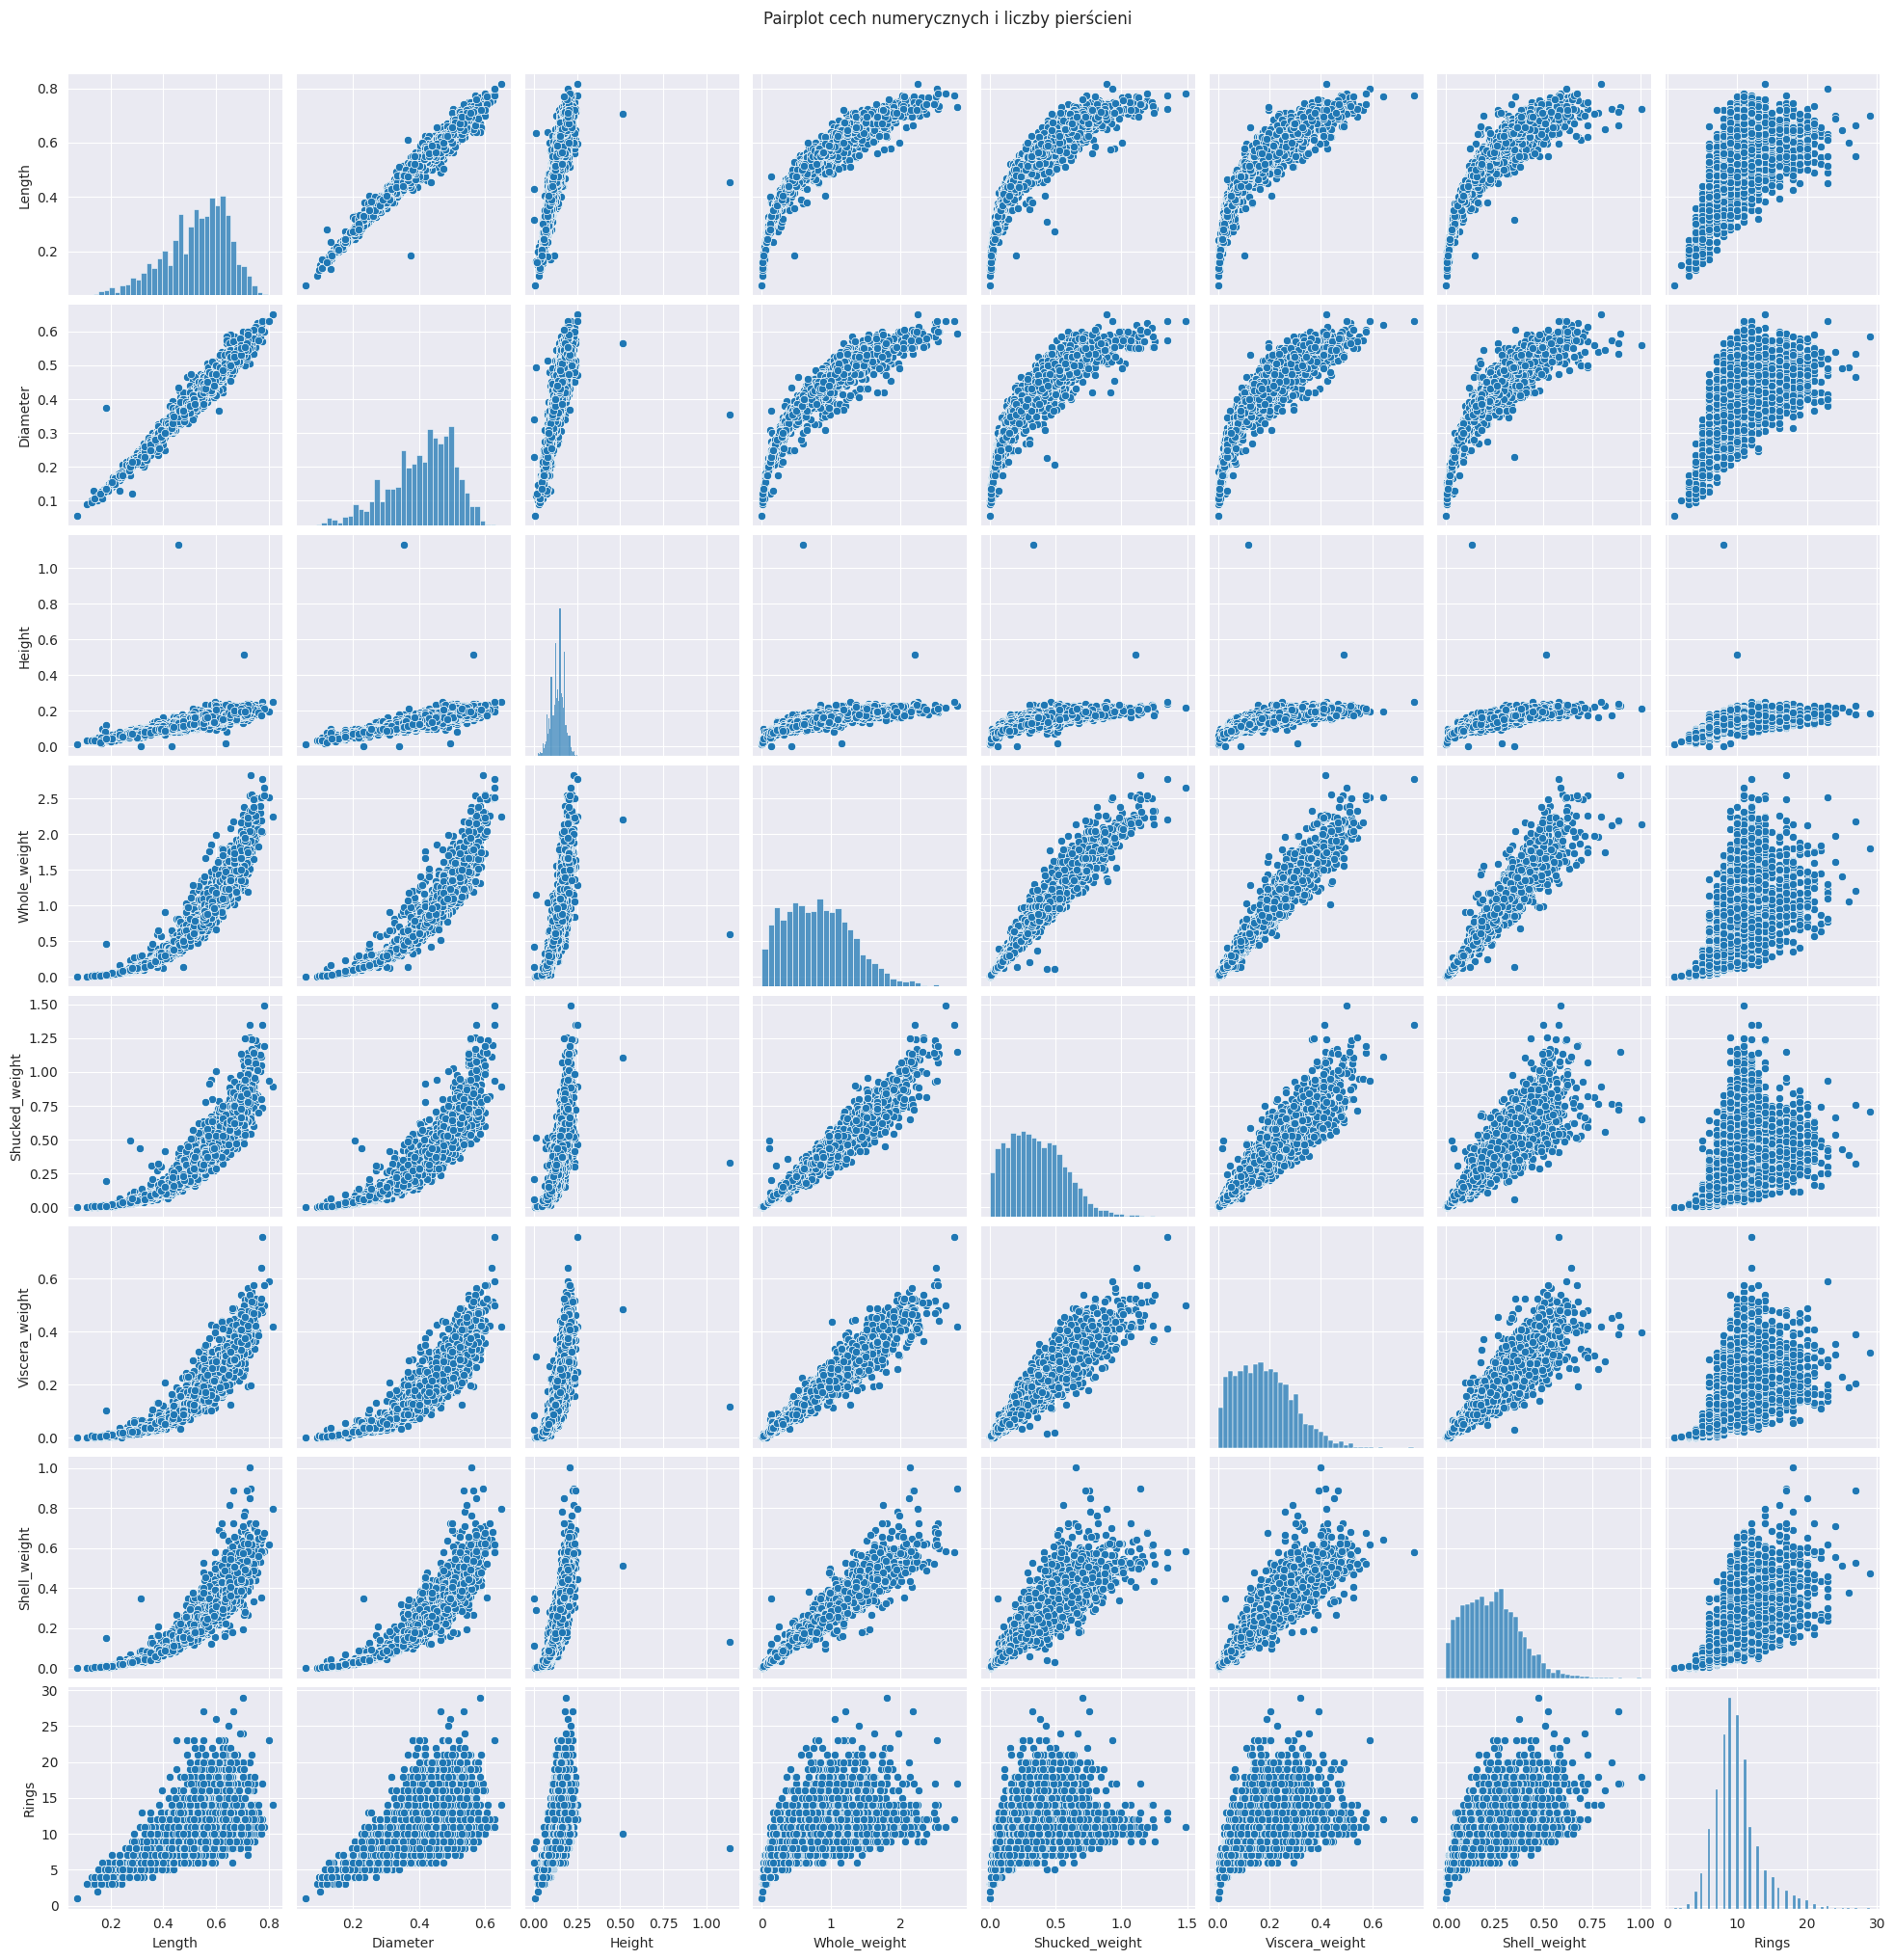

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns])
plt.title("Boxploty cech numerycznych")
plt.xticks(rotation=45)
plt.show()

sm.qqplot(df['Rings'], line='s')
plt.title("Q-Q plot dla liczby pierścieni (Rings)")
plt.show()

sns.pairplot(df[numeric_columns + ['Rings']])
plt.suptitle("Pairplot cech numerycznych i liczby pierścieni", y=1.02)
plt.show()

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i+1)
    sns.violinplot(x=df['Sex'], y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_columns + ['Rings']].corr(), annot=True, cmap='coolwarm')
plt.title("Macierz korelacji")
plt.show()

### Box plot
Dla cech: Length, Diameter oraz Height rozkład ich wartości jest względnie symetryczny, dla Length wartości koncentrują się w okolicy sredniej 0.5, dla Diameter w okolicach 0.4 a dla Height są to wartości pomiędzy 0.1 a 0.2. dla Height widać występowanie kilku znacząco oddalonych outlierów. Cecha Whole_weight wykazuje największą rozpiętość wartości z wydłużonym ogonem w strone wyższych wartości co wskazuje na istnienie dużej ilości cięższych osobników, istnieje również wielu outlierów po stronie z wyższymi wartościami. Cechy Shucked_weight, Viscera_weight, Shell_weight wyglądają analogicznie do cechy Whole_weight, również posiadają niesymetryczny rozkład oraz wielu outlierów. Wynika to z tego, że tecechy są składowymi cechy Whole_weight.

### Q-Q plot
Q-Q plot pokazuje zgodność danych z rozkładem normalnym. Jak widać na wykresie na brzegach po lewej i po prawej stronie dla cechy Rings istnieją odchylenia od rozkładu normalnego natomiast środkowa częśc wykresu jest częściowo zgodna z rozkładem normalnym. Z wykresu można odczytać, że jest ona asymetryczny, istnieje wiele osobników z większą ilością pierścieni.

### Pairplot
Na pairplocie można zauważyć nieliniową korelacje pomiędzy cechami wielkościowymi czyli: Length, Diameter i Height a cechami wagowymi czyli: Whole_weight, Shucked_weight, Viscera_weight oraz Shell_weight. Punky układają się krzywoliniowo co sugeruje, że przyrost wagi spowalnia wraz z przyrostem wielkości. Na wykresach widać również korelacje pomiędzy cechami fizycznymi małż a liczbą ich pierścieni, jednak ta korelacja nie jest ściśle proporcjonalna, a punkty są bardzo rozproszone.

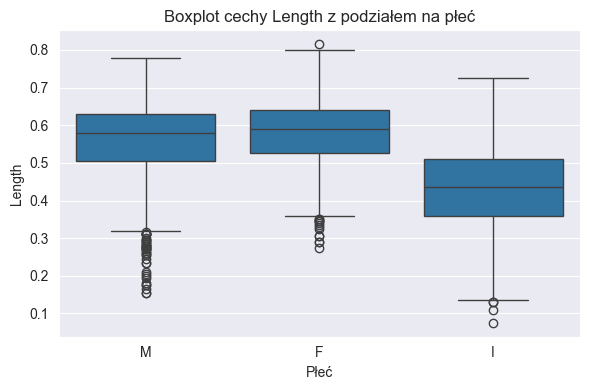

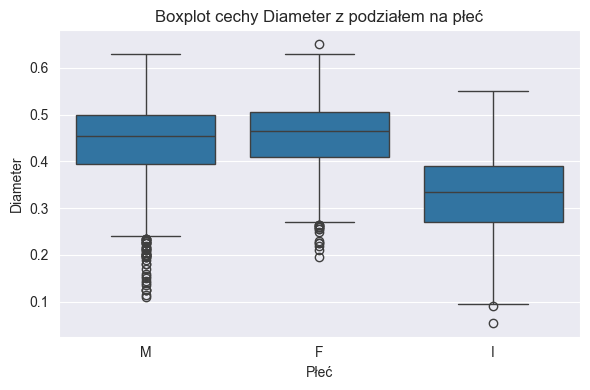

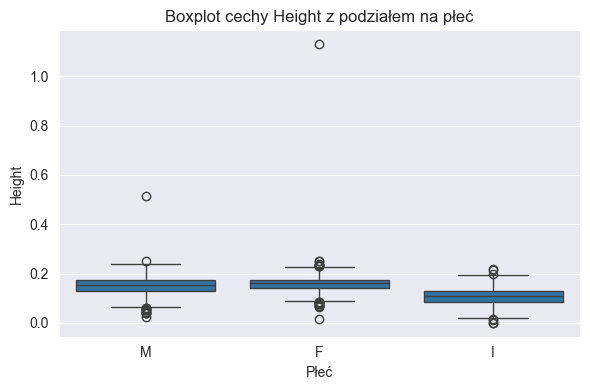

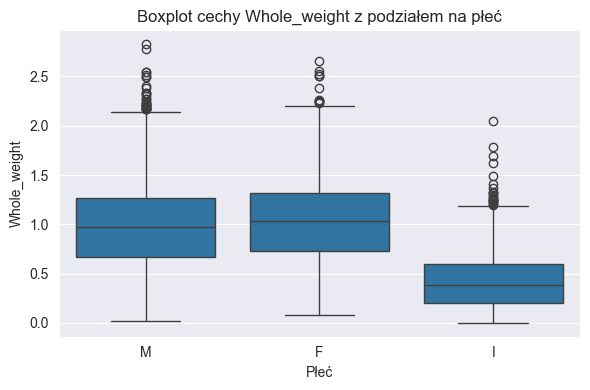

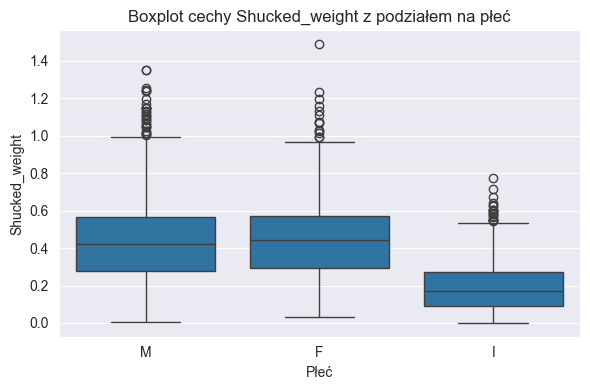

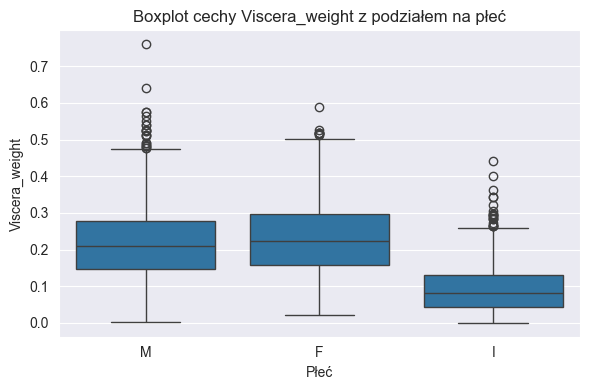

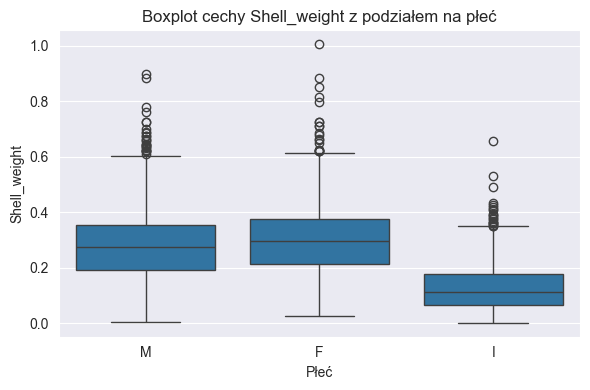

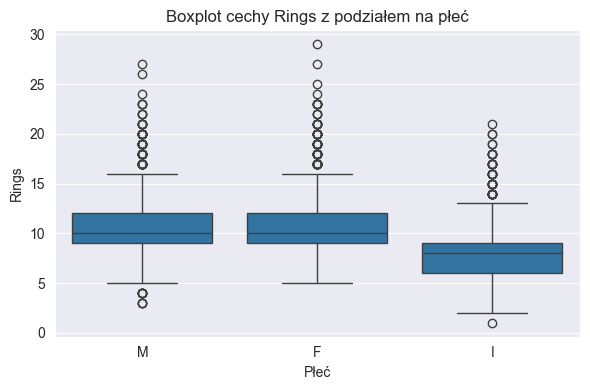

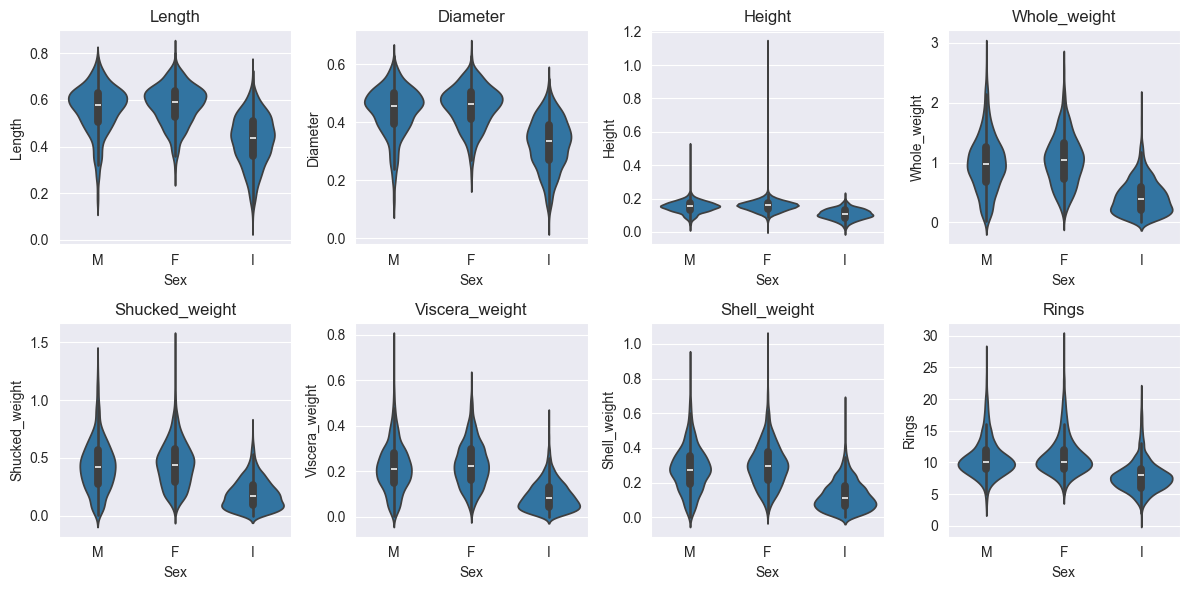

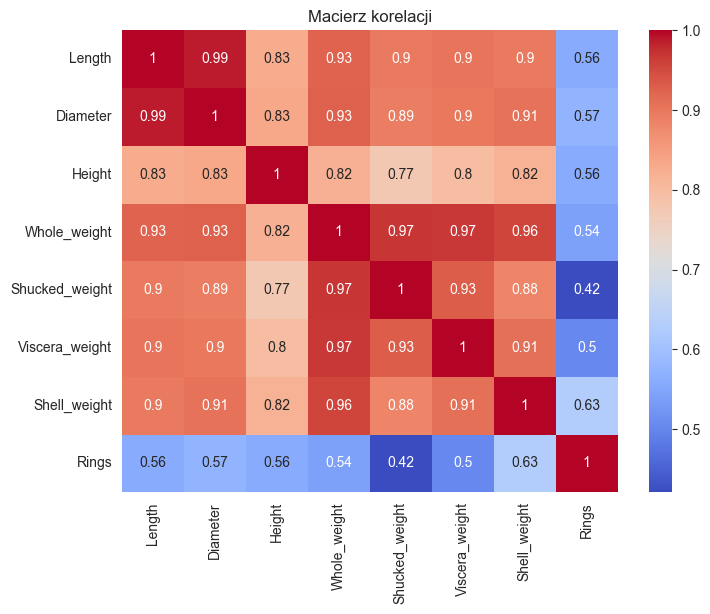

In [9]:
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Sex', y=col, data=df)
    plt.title(f"Boxplot cechy {col} z podziałem na płeć")
    plt.xlabel("Płeć")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i+1)
    sns.violinplot(x='Sex', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Macierz korelacji")
plt.show()


### Box ploty i violin ploty dla cech w zależności od płci
Zarówno osobniki męskie jak i żeńskie mają podobną długość, osobniki męśkie posiadają więcej outlierów, osobniki infant mają mniejszą długość.
Analogicznie do długości, zarówno osobniki męskie i żeńskie mają podobne wartości a osobniki infant mniejsze. Wartości wysokosći nie różnią się zbytnio miedzy płciami, widać również małą różnice pomiędzy infantami a dorosłymi osobnikami. Dla cech wagi widać, że dorosłe osobniki mają podobne wartości, które nie różnią się pomiędzy płcami. Infanty posiadają mniejsze wartości wagi. Widać również wielu outlierów posiadających większe wartości.

### Macierz korelacji
Na macierzy korelacji widać silne korelacje np. pomiędzy długością a średnicą, długością a wagą itd. Widać również że cechy fizyczne mają średnią korelacje z liczbą pierścieni.

## Testy normalności rozkładów

H_0 = Dane pochodzą z rozkładu normalnego

H_1 = Dane nie pochodzą z rozkładu normalnego

Przeprowadzone testy:
- D’Agostino-Pearsona
- Shapiro-Wilka
- Andersona-Darlinga

Alfa przyjęto jako 0.05.

In [8]:
from scipy.stats import normaltest, shapiro, anderson

results = []
alpha = 0.05

for col in numeric_columns:
    x = df[col]

    # Test D’Agostino-Pearsona
    k2_stat, k2_p = normaltest(x)

    # Test Shapiro-Wilka
    shapiro_stat, shapiro_p = shapiro(x)

    # Test Andersona-Darlinga
    anderson_result = anderson(x)
    anderson_stat = anderson_result.statistic
    anderson_crit_val_5 = anderson_result.critical_values[2]

    # Zapisz wyniki
    results.append({
        "Cecha": col,
        "D'Agostino_stat": round(k2_stat, 4),
        "D'Agostino_p": round(k2_p, 4),
        "H0 orzucona D'Agostino": k2_p < alpha,
        "Shapiro_stat": round(shapiro_stat, 4),
        "Shapiro_p": round(shapiro_p, 4),
        "H0 orzuconaShapiro": shapiro_p < alpha,
        "Anderson_stat": round(anderson_stat, 4),
        "Anderson_crit": round(anderson_crit_val_5, 4),
        "H0 odrzucona Anderson": anderson_stat > anderson_crit_val_5
    })

normality_df = pd.DataFrame(results)
normality_df

,Cecha,D'Agostino_stat,D'Agostino_p,H0 orzucona D'Agostino,Shapiro_stat,Shapiro_p,H0 orzuconaShapiro,Anderson_stat,Anderson_crit,H0 odrzucona Anderson
0,Length,242.1589,0.0,True,0.9697,0.0,True,36.6212,0.786,True
1,Diameter,222.1306,0.0,True,0.9705,0.0,True,36.4378,0.786,True
2,Height,3528.1390,0.0,True,0.8896,0.0,True,14.4931,0.786,True
3,Whole_weight,174.2156,0.0,True,0.9723,0.0,True,20.9927,0.786,True
4,Shucked_weight,332.1407,0.0,True,0.9621,0.0,True,27.2292,0.786,True
5,Viscera_weight,212.1444,0.0,True,0.9681,0.0,True,25.7111,0.786,True
6,Shell_weight,261.1200,0.0,True,0.9704,0.0,True,18.5607,0.786,True
7,Rings,813.4492,0.0,True,0.9312,0.0,True,78.6001,0.786,True


Wszystkie trzy testy normalności rozkładów wyzkazały brak rozkładu normalnego dla wszystkich cech.

## Testy statystyczne dla średniej i wariancji

Przeprowadzone testy:
- Test t dla jednej próby
- Test chi kwadrat

Dla testu t:
- H_0 = średnia próbki zgada się z wartością teoretyczną
- H_1 = średnia próbki różni się od wartości teoretycznej

Dla testu chi kwadrat:
- H_0 = wariancja próbki zgada się z wartością teoretyczną
- H_1 = wariancja próbki różni się od wartości teoretycznej

Do preprowadzenia testów użyto losowo wybranych próbek danych

Alfa przyjęto jako 0.05.

In [23]:
from scipy.stats import ttest_1samp, chi2

stats_df = pd.DataFrame({
    'Feature': ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
    'Mean': np.round([0.52399, 0.407881, 0.139516, 0.828742, 0.359367, 0.180594, 0.238831, 9.933684], 4),
    'Var': np.round([0.014422, 0.009849, 0.001750, 0.240481, 0.049268, 0.012015, 0.019377, 10.395266], 4)
})

results = []
alpha = 0.05

for feature in numeric_columns:
    data = df[feature].dropna().sample(n=500, random_state=42)
    n = len(data)
    sample_mean = data.mean()
    sample_var = data.var(ddof=1)

    mu_0 = stats_df.loc[stats_df['Feature'] == feature, 'Mean'].values[0]
    t_stat, t_p = ttest_1samp(data, popmean=mu_0)
    t_h0_reject = t_p < alpha

    sigma2_0 = stats_df.loc[stats_df['Feature'] == feature, 'Var'].values[0]
    chi2_stat = (n - 1) * sample_var / sigma2_0
    chi2_p = 2 * min(
        chi2.cdf(chi2_stat, df=n - 1),
        1 - chi2.cdf(chi2_stat, df=n - 1)
    )
    chi2_h0_reject = chi2_p < alpha

    results.append({
        'Feature': feature,
        'T_stat': t_stat,
        'T_p_value': t_p,
        'T_H0_reject': t_h0_reject,
        'Chi2_stat': chi2_stat,
        'Chi2_p_value': chi2_p,
        'Chi2_H0_reject': chi2_h0_reject
    })

results_df = pd.DataFrame(results)

# Zaokrąglenie do 4 miejsc po przecinku
results_df = results_df.round(4)
results_df

,Feature,T_stat,T_p_value,T_H0_reject,Chi2_stat,Chi2_p_value,Chi2_H0_reject
0,Length,-0.5185,0.6044,False,508.9213,0.7391,False
1,Diameter,-0.3870,0.6989,False,502.9596,0.8838,False
2,Height,-0.4955,0.6205,False,398.3901,0.0007,True
3,Whole_weight,-0.2833,0.7770,False,456.3902,0.1713,False
4,Shucked_weight,-0.7038,0.4819,False,432.0297,0.0277,True
5,Viscera_weight,-0.1174,0.9066,False,478.0160,0.5140,False
6,Shell_weight,-0.4087,0.6829,False,458.7477,0.1974,False
7,Rings,-0.2990,0.7651,False,512.6307,0.6537,False


Powyższe testy zostały wykonane na próbce 500 losowo wybranych rekordów z całego zbioru danych. Test t wykazał brak znacznych różnic pomiędzy średnią wartością próbki a średnią dla całego zbioru danych dla konkretnej cechy co pokazuje, że wylosowana próbka reprezentuje cały zbiór danych. Test chi kwadrat zaś przy badanej próbce wykazuje różnice pomiędzy wariancją próbki a wariancją całego zbioru dla cech: height oraz shucked_weight, taki wynik może byc spowodowanyc przez outliery, które znalazł się w wylosowanej próbce.

Przeprowadzony test:
- Test Levene - sprawdzenie czy cechy płci M i F mają taką samą wariancję

Dla testu Levene:
- H_0 = wariancja cechy zgadza się pomiędzy grupami
- H_1 = wariancja cechy różni się pomiędzy grupami

Alfa przyjęto jako 0.05.

In [22]:
import pandas as pd
from scipy.stats import f_oneway, levene

numeric_cols = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
groups = df['Sex'].unique()
alpha = 0.05

results = []

for col in numeric_cols:
    grouped_data = [df[df['Sex'] == sex][col].dropna() for sex in ['M', 'F']]

    w_stat, p_levene = levene(*grouped_data)

    results.append({
        'Feature': col,
        'Levene_stat': round(w_stat, 4),
        'Levene_p_value': round(p_levene, 4),
        'Levene_H0_reject': p_levene < alpha
    })

results_df = pd.DataFrame(results)
results_df


,Feature,Levene_stat,Levene_p_value,Levene_H0_reject
0,Length,15.4635,0.0001,True
1,Diameter,15.3122,0.0001,True
2,Height,4.3767,0.0365,True
3,Whole_weight,5.1200,0.0237,True
4,Shucked_weight,9.3724,0.0022,True
5,Viscera_weight,2.1645,0.1413,False
6,Shell_weight,1.4174,0.2339,False
7,Rings,0.7229,0.3953,False


Test Leneve wykazał różnice w wariancji dla wszystkich cech poza height. Testy te pokazują, że dla analizowanego gatunku występują znaczące różnice w budowie w zależności od płci. Pokazuje to, że na ich podstawie może dokonywać predykcji płci dla danego osobnika.

Przeprowadzone testy:
- Test t dla dwóch niezależnych grup

H_0 = średnia cechy zgadza się pomiędzy grupami

H_1 = średnia cechy różni się pomiędzy grupami

Przyjęto alfa 0.05.

In [18]:
from scipy.stats import ttest_ind

males = df[df['Sex'] == 'M']['Length'].dropna()
females = df[df['Sex'] == 'F']['Length'].dropna()

t_stat, p_value = ttest_ind(males, females)

alpha = 0.05

results_df = pd.DataFrame([{
    'Feature': 'Length',
    'T_stat': round(t_stat, 4),
    'p_value': round(p_value, 4),
    'T_H0_reject': p_value < alpha
}])

results_df = pd.DataFrame(results_df)
results_df

,Feature,T_stat,p_value,T_H0_reject
0,Length,-4.9235,0.0,True


Test t dla dwóch niezależnych grup (płci męskiej i żeńskiej) wykazał znaczącą różnice pomiędy płciami dla cechy: length. Oznacza to, że osobniki w zależności od płci znacząco różnią się od siebie pod względem długości.